In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the CSV file containing our information
df = pd.read_csv("video_games_sales.csv", index_col= "rank")
df.describe()

,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
#Now we know that the year column is the only one with nulls, we should check if they are a significant amount of sales
dfna = df.loc[(df["year"].isnull())]
print(str(round(dfna["global_sales"].sum()*100/df["global_sales"].sum(),2)) + "%")

1.12%


In [4]:
#Looks like they are not a significant amount for our analysis, we proceed to clean our dataframe
df.dropna(inplace=True)

In [5]:
#Our analysis through time will be easier if we use the gaming consoles generations, this will 
#make it easier for us to detect purchase behaviour according to time specific tendencies
def generationing(row):
    if row["year"] >= 1980 and row["year"] < 1983:
        return "Second"
    elif row["year"] >= 1983 and row["year"] < 1988:
        return "Third"
    elif row["year"] >= 1988 and row["year"] < 1993:
        return "Fourth"
    elif row["year"] >= 1993 and row["year"] < 1999:
        return "Fifth"
    elif row["year"] >= 1999 and row["year"] < 2005:
        return "Sixth"
    elif row["year"] >= 2005 and row["year"] < 2012:
        return "Seventh"
    else:
        return "Eighth"

df["Generation"] = df.apply(lambda row: generationing(row), axis=1)

df

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,Generation
rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Seventh
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Third
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Seventh
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Seventh
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Fifth
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Sixth
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Sixth
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Seventh


[Text(0, 0, 'Second'),
 Text(1, 0, 'Third'),
 Text(2, 0, 'Fourth'),
 Text(3, 0, 'Fifth'),
 Text(4, 0, 'Sixth'),
 Text(5, 0, 'Seventh'),
 Text(6, 0, 'Eighth')]

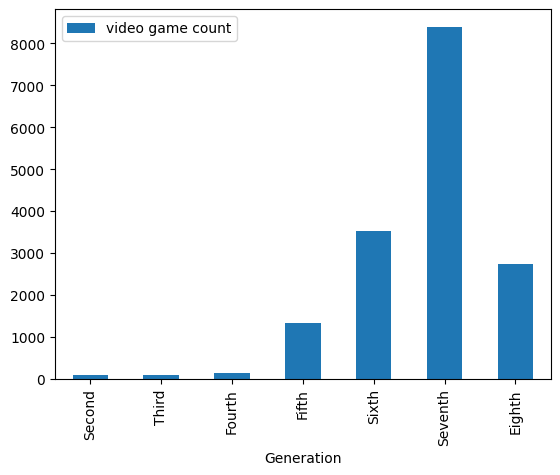

In [6]:
#Now to get the amount of released games in each generation, we group by generation and plot the count
category_count = df.groupby("Generation").size().reset_index(name='video game count').set_index("Generation")
#It wouldn't make much sense to plot the generations in alphabetical order so we order it correctly
generation_order = ["Second", "Third", "Fourth", "Fifth", "Sixth", "Seventh", "Eighth"]
#We use loc to rearrange the information in the dataset
ax = category_count.loc[generation_order].plot(kind= "bar")
#And we use set_xticklabels to be sure the infomation plotted matches the information in the axis labels
ax.set_xticklabels(generation_order)

We can see that our analysis will be highly influenced by the concentration of game releases in the last 3 generations, which at hand are the ones we are interested in as we don't plan to remaster an old game but to release a new one. Therefore we will discard generations from second to fifth (1980-1999.)

In [19]:
df = df[df["Generation"].str.contains("Second|Third|Fourth|Fifth") == False]
df

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,Generation
rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Seventh
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Seventh
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Seventh
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Seventh
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Seventh
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,Sixth
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Sixth
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,Seventh


<Axes: xlabel='genre'>

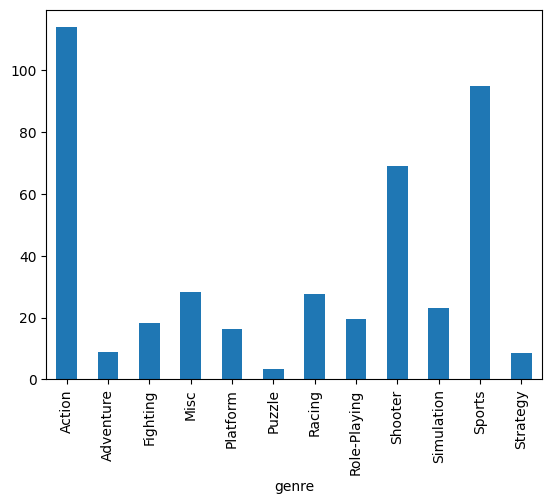

In [7]:
#Try #2 with Pivot Table
#Our videogames experience has focused mainly in Action with an average global_sales of 27M USD, 
#so we wanna see how the publishers with the similar trajectories in this genre have done with other genres 
#excluding platform genre which is outside of our interest area
table = pd.pivot_table(df, index = "publisher", values = "global_sales", columns="genre", aggfunc=np.sum)
aimed_sales = table[(table["Action"]> 27) & (table["Action"]> 60)  & (table["Platform"]< 60)]
mean_aimed_sales = aimed_sales.T.mean(axis=1)
mean_aimed_sales.plot(kind= "bar")

In [8]:
table2 = table.agg(max)
table2

genre
Action          211.08
Adventure        35.71
Fighting         72.86
Misc            180.67
Platform        426.18
Puzzle          124.88
Racing          151.30
Role-Playing    284.57
Shooter         295.40
Simulation       89.53
Sports          468.69
Strategy         26.72
dtype: float64

In [13]:
#We want to see the trends each publisher has had through time and plan according to our similarities
publisher_genre_sales = df.groupby(["publisher", "genre"])["global_sales"].sum()


In [10]:
max_sales_pgenre = publisher_genre_sales.groupby("publisher").idxmax()
max_sales_pgenre

publisher
10TACLE Studios                            (10TACLE Studios, Strategy)
1C Company                                      (1C Company, Strategy)
20th Century Fox Video Games    (20th Century Fox Video Games, Action)
2D Boy                                                (2D Boy, Puzzle)
3DO                                                      (3DO, Action)
                                                 ...                  
id Software                                     (id Software, Shooter)
imageepoch Inc.                        (imageepoch Inc., Role-Playing)
inXile Entertainment              (inXile Entertainment, Role-Playing)
mixi, Inc                                          (mixi, Inc, Action)
responDESIGN                                    (responDESIGN, Sports)
Name: global_sales, Length: 576, dtype: object

In [11]:
total_sales_by_genre = df.groupby(["publisher", "genre"])["global_sales"].sum()